In [1]:
#import neccerary libarary

import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import random as rn
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras import layers
import os


In [2]:
#!pip install tensorflow

In [3]:
#!pip install q keras==2.2.

In [4]:
keras.__version__

'2.8.0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load the data set

df= pd.read_csv("/content/drive/MyDrive/train000000new.csv")
df 

,Ir11,Ir21,Ir31,Ir12,Ir22,Ir32,Voltage_pmax
0,512.142648,1068.906497,879.054931,1080.772540,1305.994998,1361.837196,89.993092
1,268.839689,194.423884,974.772872,131.348038,735.566165,742.481906,57.636579
2,1205.595736,678.794667,550.838906,940.003595,1037.761121,728.073454,91.408712
3,486.797740,209.996155,820.528894,367.003445,62.235729,1056.906574,60.258072
4,339.899501,619.363238,962.914519,502.919495,1030.876104,552.590465,92.205001
...,...,...,...,...,...,...,...
36066,1360.482637,180.724000,1.239812,26.734347,908.081127,1397.015427,26.286162
36067,408.544223,605.644481,558.175894,650.700562,404.113985,612.354577,91.700403
36068,1213.750998,201.906257,215.421587,662.613105,767.126571,219.874625,26.548844
36069,186.868477,380.141687,82.360999,1249.968115,676.074654,967.822349,92.165868


In [7]:
data_frame = pd.DataFrame(df)
data_frame

,Ir11,Ir21,Ir31,Ir12,Ir22,Ir32,Voltage_pmax
0,512.142648,1068.906497,879.054931,1080.772540,1305.994998,1361.837196,89.993092
1,268.839689,194.423884,974.772872,131.348038,735.566165,742.481906,57.636579
2,1205.595736,678.794667,550.838906,940.003595,1037.761121,728.073454,91.408712
3,486.797740,209.996155,820.528894,367.003445,62.235729,1056.906574,60.258072
4,339.899501,619.363238,962.914519,502.919495,1030.876104,552.590465,92.205001
...,...,...,...,...,...,...,...
36066,1360.482637,180.724000,1.239812,26.734347,908.081127,1397.015427,26.286162
36067,408.544223,605.644481,558.175894,650.700562,404.113985,612.354577,91.700403
36068,1213.750998,201.906257,215.421587,662.613105,767.126571,219.874625,26.548844
36069,186.868477,380.141687,82.360999,1249.968115,676.074654,967.822349,92.165868


In [8]:
# Creating features and labels
x = data_frame.drop("Voltage_pmax", axis=1)
y = data_frame["Voltage_pmax"]


x.shape, y.shape

((36071, 6), (36071,))

In [9]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
len(x), len(x_train), len(x_test)

(36071, 28856, 7215)

In [10]:
x_train.head()

,Ir11,Ir21,Ir31,Ir12,Ir22,Ir32
18587,909.333754,1368.936536,708.068856,1266.382974,762.401992,1147.004915
30051,925.553851,137.126888,1292.529483,633.197713,1303.320110,678.930894
19859,300.816487,802.726434,1367.709854,193.128737,152.176900,839.294910
4024,1120.542172,629.472797,386.422632,1016.176240,555.916814,544.373229
29271,941.154163,135.523691,53.668265,802.869232,38.082105,792.149122


In [11]:
y_train.head()

18587    92.314060
30051    59.279218
19859    59.695109
4024     91.746528
29271    57.481358
Name: Voltage_pmax, dtype: float64

In [12]:
#Preprocessing and feature extraction
x_train = x_train.values
x_train = x_train.reshape(-1, 6)
print(x_train.shape)
x_train[:28856]

(28856, 6)


array([[ 909.3337538 , 1368.936536  ,  708.0688557 , 1266.382974  ,
         762.4019919 , 1147.004915  ],
       [ 925.5538506 ,  137.1268879 , 1292.529483  ,  633.1977128 ,
        1303.32011   ,  678.9308944 ],
       [ 300.816487  ,  802.7264343 , 1367.709854  ,  193.1287375 ,
         152.1769005 ,  839.2949104 ],
       ...,
       [1340.203314  ,  700.8650651 ,  314.3001557 ,   23.50399012,
         753.734799  ,  877.8167115 ],
       [ 466.4502737 ,  185.2900018 ,  538.685389  , 1058.050117  ,
        1039.445502  ,  356.9191921 ],
       [ 701.2580632 , 1392.66342   ,  600.0961911 ,  374.2833566 ,
         662.1326311 ,  225.1834636 ]])

In [13]:
#Preprocessing and feature extraction
y_train = y_train.values
y_train = y_train.reshape(-1, 1)
print(y_train.shape)
y_train[:28856]

(28856, 1)


array([[92.31405995],
       [59.27921785],
       [59.69510926],
       ...,
       [58.95308099],
       [57.13818316],
       [92.56779595]])

In [14]:
#we'll use the min/max scalar to scale our data between zero and Run first of all we

# will fit and transform our training data and we'll print the first five rows here 


scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_train[:28856]

array([[0.6496186 , 0.97783819, 0.50578557, 0.90457885, 0.54456042,
        0.81933154],
       [0.66120726, 0.09794051, 0.9233156 , 0.45225786, 0.93094702,
        0.48496047],
       [0.21485544, 0.57338694, 0.97702334, 0.13789103, 0.10866672,
        0.59951732],
       ...,
       [0.95745901, 0.50062604, 0.22448303, 0.01671823, 0.5383693 ,
        0.62703557],
       [0.33319468, 0.13234405, 0.38478052, 0.7557546 , 0.7424571 ,
        0.25492976],
       [0.50095619, 0.99478661, 0.42865149, 0.2673003 , 0.47293639,
        0.16082367]])

In [15]:
x_test = scaler.fit_transform(x_test)
x_test[:7215]

array([[0.59792003, 0.81224846, 0.8148128 , 0.08919697, 0.73132123,
        0.9039274 ],
       [0.48063721, 0.06686502, 0.08193273, 0.31728666, 0.3145779 ,
        0.33798069],
       [0.53788118, 0.13394668, 0.54105187, 0.85735528, 0.19800503,
        0.15543562],
       ...,
       [0.26992563, 0.10358422, 0.35961186, 0.81329681, 0.57460864,
        0.76415093],
       [0.58504245, 0.77821082, 0.69137151, 0.58209573, 0.37198459,
        0.26435465],
       [0.43898298, 0.62300006, 0.29939654, 0.08141685, 0.86762687,
        0.73432345]])

In [16]:



inputs = keras.Input(shape=(6,))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(74, activation="relu")(x)
x = layers.Dense(94, activation="sigmoid")(x)
x = layers.Dense(104, activation="relu")(x)
x = layers.Dense(84, activation="softmax")(x)
x = layers.Dense(74, activation="sigmoid")(x)
x = layers.Dense(64, activation="linear")(x)
x = layers.Dense(54, activation="linear")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 74)                4810      
                                                                 
 dense_2 (Dense)             (None, 94)                7050      
                                                                 
 dense_3 (Dense)             (None, 104)               9880      
                                                                 
 dense_4 (Dense)             (None, 84)                8820      
                                                                 
 dense_5 (Dense)             (None, 74)                6290  

In [17]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='mae')

In [18]:
history = model.fit(x_train, y_train,epochs=1000,validation_split=0.1, batch_size=10)

Epoch 1/1000
2597/2597 [==============================] - 39s 13ms/step - loss: 591.4243 - mae: 18.0381 - val_loss: 304.5522 - val_mae: 14.4869
Epoch 2/1000
2597/2597 [==============================] - 25s 9ms/step - loss: 250.7132 - mae: 12.0262 - val_loss: 221.1159 - val_mae: 10.5750
Epoch 3/1000
2597/2597 [==============================] - 15s 6ms/step - loss: 197.7946 - mae: 10.2213 - val_loss: 196.3029 - val_mae: 10.1103
Epoch 4/1000
2597/2597 [==============================] - 21s 8ms/step - loss: 175.2199 - mae: 9.5718 - val_loss: 173.7074 - val_mae: 9.4868
Epoch 5/1000
2597/2597 [==============================] - 16s 6ms/step - loss: 164.7551 - mae: 9.3061 - val_loss: 164.6612 - val_mae: 9.4859
Epoch 6/1000
2597/2597 [==============================] - 12s 4ms/step - loss: 157.4340 - mae: 9.1606 - val_loss: 158.1047 - val_mae: 9.3000
Epoch 7/1000
2597/2597 [==============================] - 9s 3ms/step - loss: 150.8949 - mae: 8.9622 - val_loss: 150.9377 - val_mae: 8.8931
Epoch 8

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


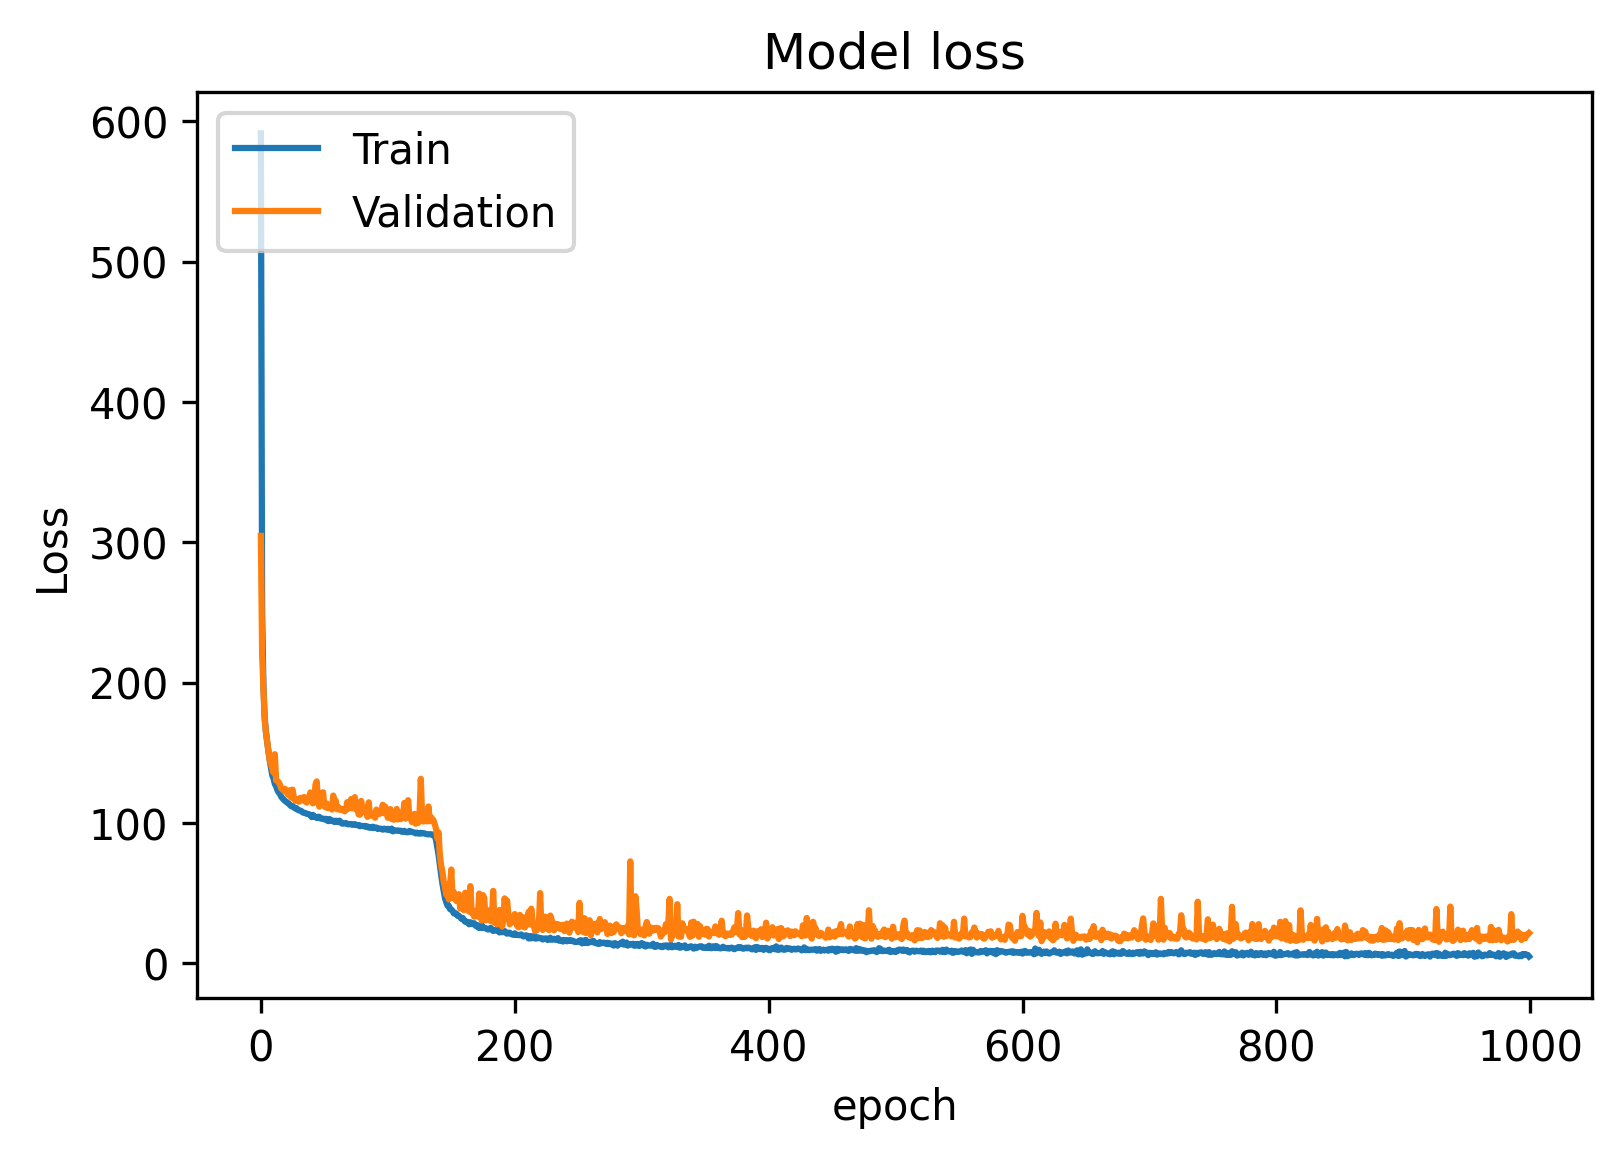

In [19]:
print(history.history.keys())

plt.rcParams["figure.dpi"]=300
plt.rcParams["savefig.dpi"]=300
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#check whetert we save the model or not
if(not os.path.exists('maximum_power_prediction3.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('maximum_power_prediction3.h5')

Epoch 1/50
902/902 [==============================] - 3s 3ms/step - loss: 5.0036 - mae: 1.0040
Epoch 2/50
902/902 [==============================] - 2s 3ms/step - loss: 4.1705 - mae: 0.9750
Epoch 3/50
719/902 [======================>.......] - ETA: 0s - loss: 5.4772 - mae: 1.0252

In [ ]:
model1 = load_model('maximum_power_prediction3.h5')

In [ ]:
y_preds = model1.predict(x_test)

In [ ]:
y_test = tf.squeeze(y_test)

In [ ]:
y_test

In [ ]:
y_preds=tf.squeeze(y_preds)

In [ ]:
y_preds

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(y_test, color='green',  label="True power")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(y_preds)),y_preds, color='red', label='Predicted power')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)



In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')